<a href="https://colab.research.google.com/github/DineshKatravath/da6401_assignment1/blob/main/DA6401_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to Wandb

In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs24m018 (cs24m018-iitmaana) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb

# Initialize a new WandB run
wandb.init(project="DA6401 Assignment1")

# Example: Log some metrics
wandb.log({"loss": 0.5, "accuracy": 0.8})

# Finish the run when you're done
wandb.finish()

accuracy,▁
loss,▁
accuracy,0.8
loss,0.5


# Question 1

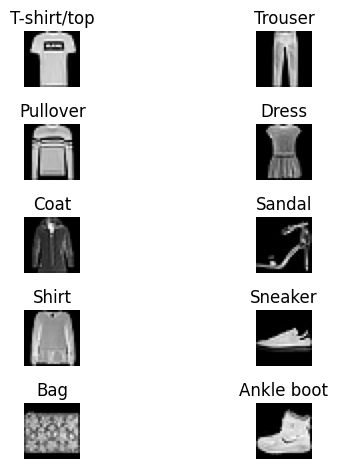

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure with a grid of subplots
fig, axs = plt.subplots(5, 2)

# Loop through each class
for i in range(10):
    # Find the first image of the current class in the training set
    idx = np.where(y_train == i)[0][0]

    # Plot the image

    x = i//2
    y = i%2

    axs[x,y].imshow(x_train[idx], cmap='gray')
    axs[x,y].set_title(class_labels[i])
    axs[x,y].axis('off')  # Turn off axis for better visualization

plt.tight_layout()
plt.show()

# Question 2

In [ ]:
# Activation Functions

def sigmoid(X):
  return 1./1+np.exp(-X)

def tanh(X):
  return np.exp(X)-np.exp(-X)/np.exp(X)+np.exp(-X)

def relu(X):
  return np.maximum(0,X)

def softMax(X):
  # subtracting maxVal for stability
  maxVal = np.max(X,axis=0)
  X = X - maxVal
  return np.exp(X)/np.sum(np.exp(X),axis=0)


# Gradient Activation Functions

def sigmoidGrad(X):
  return sigmoid(X)*(1-sigmoid(X))

def tanhGrad(X):
  return 1-tanh(X)**2

def reluGrad(X):
  return np.where(X>0,1,0)

def softMaxGrad(X):
  return softMax(X)*(1-softMax(X))

# Weight Initializations

def randomInit(shape):
  return np.random.randn(*shape)*0.01

def xavierInit(shape):
  inputCount,outputCount = shape
  std = np.sqrt(2/(inputCount+outputCount))
  return np.random.normal(0,std,shape)

In [ ]:
class feedForwardNeuralNetwork:

  def __init__(self,inputSize,hiddenSize,hiddenLayerCount,outputSize,epochs,batchSize,weightDecay,beta):
    self.inputSize = inputSize
    self.hiddenSize = hiddenSize
    self.hiddenLayerCount = hiddenLayerCount
    self.outputSize = outputSize
    self.epochs = epochs
    self.batchSize = batchSize
    self.weightDecay = weightDecay
    self.beta = beta
    self.initialize()
    self.weights = []
    self.biases = []
    self.activationLayer = []
    self.preActivationLayer = []

  def initialize(self,initMode = 'xavier'):

    weights = []
    biases = []
    activationLayer = []
    preActivationLayer = []

    for i in range(self.hiddenLayerCount+1):
      if initMode == 'xavier': # initializing random weights
        weights.append(xavierInit((self.hiddenSize,self.hiddenSize)))
      else:
        weights.append(randomInit((self.hiddenSize,self.hiddenSize)))
        biases.append(np.zeros((self.hiddenSize,1))) # initializing biases to 0.

    self.weights = weights
    self.biases = biases
    self.activationLayer = activationLayer
    self.preActivationLayer = preActivationLayer

  def activationLayer(self,X,type='softmax'):
    if type == 'sigmoid':
      activatedLayer = sigmoid(X)
    elif type == 'tanh':
      activatedLayer = tanh(X)
    elif type == 'relu':
      activatedLayer = relu(X)
    elif type == 'softmax':
      activatedLayer = softMax(X)

    return activatedLayer

  def gradActivationLayer(self,X,type='softmax'):
    if type == 'sigmoid':
      gradActivatedLayer = sigmoidGrad(X)
    elif type == 'tanh':
      gradActivatedLayer = tanhGrad(X)
    elif type == 'relu':
      gradActivatedLayer = reluGrad(X)
    elif type == 'softmax':
      gradActivatedLayer = softMaxGrad(X)

    return gradActivatedLayer

  def outputActivationLayer(self,X):
    return softMax(X)

  def inputLayer(self,X):
    return np.dot(self.weights[0],X)+self.biases[0]

  def hiddenLayer(self,X,layerNo):
    activatedLayer = self.activationLayer(X)
    self.activationLayer.append(activatedLayer)
    return np.dot(self.weights[layerNo],activatedLayer)+self.biases[layerNo]

  def forward(self,X):

    self.activationLayer.append(X) # h0 is input
    self.preActivationLayer.append(self.inputLayer(X))
    for num in range(1,self.hiddenLayerCount+1):
      self.preActivationLayer.append(self.hiddenLayer(self.preActivationLayer[num-1],num))

    self.output = self.activationLaself.outputActivationLayer(self.preActivationLayer[self.hiddenLayerCount])

  def backPropagation(self,X,ypred,y,weights,ai_x,hi_x,loss="crossEntropyLoss",activationType="softmax"):

    dw = []
    db = []

    # gradient of loss w.r.t pre-activation of output layer

    if loss == "crossEntropyLoss":
      grad_al = -(y-ypred)
    elif loss == "squaredLoss":
      grad_al = 2*(ypred-y)*ypred(1-ypred)

    grad_ai = grad_al

    for k in range(self.hiddenLayerCount,-1,-1):
      grad_Wi = np.dot(grad_ai,hi_x[k].T) # gradient of loss w.r.t weights of kth layer
      dw.append(grad_ai)

      grad_bi = grad_ai # gradient of loss w.r.t biases of ith layer.
      db.append(grad_bi)

      if(k>0):
        grad_h = np.dot(weights[k].T,grad_ai)
        grad_a = grad_h * self.gradActivatedLayer(ai_x[k-1])
        grad_ai = grad_a

    dw.reverse()
    db.reverse()

    for i in range(len(dw)):
      dw[i] += self.weightDecay*weights[i]

    return dw,db

  def sgd(self):
    self.initialize()

    it = 0
    while it < self.epochs:
      it += 1

      i = 0
      while i<len(self.x_train):
        self.forward(self.x_train[i:i+self.batchSize])
        dw,db = self.backPropagation(self.x_train[i:i+self.batchSize],self.ypred,self.y_train[i:i+self.batchSize])

        for k in range(len(dw)):
          self.weights[k] -= self.learningRate*dw[k]
          self.biases[k] -= self.learningRate*db[k]

        i += self.batchSize

  def momentumBasedGradientDescent(self):
    self.initialize()

    it=0

    while it < self.epochs:
      it += 1

      i = 0
      while i<len(self.x_train):
        self.forward(self.x_train[i:i+self.batchSize])
        dw,db = self.backPropagation(self.x_train[i:i+self.batchSize],self.ypred,self.y_train[i:i+self.batchSize])

        # update the momentum with the gradient
        ut = self.beta*ut + dw
        ub = self.beta*ub + db

        for k in range(len(dw)):
          self.weights[k] -= self.learningRate*ut
          self.biases[k] -= self.learningRate*ub

        i += self.batchSize

  def nesterovAcceleratedBasedGradientDescent(self):
    self.initialize()

    it=0

    while it<self.epochs:
      it+=1

      i=0
      while i<len(self.x_train):
        self.forward(self.x_train[i:i+self.batchSize])
        dw,db = self.backPropagation(self.x_train[i:i+self.batchSize],self.ypred,self.y_train[i:i+self.batchSize])

        ut = self.beta*ut + dw
        ub = self.beta*ub + db

        self.weights = self.weights - self.learningRate*(self.beta*ut +dw)
        self.biases = self.biases - self.learningRate*(self.beta*ub +db)

        i += self.batchSize

